<a href="https://colab.research.google.com/github/afipolinema/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

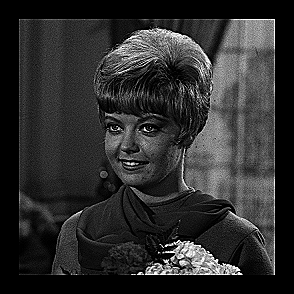

In [10]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  h_kernel, w_kernel = kernel.shape
  h_padded, w_padded = image.shape

  output_height = (h_padded - h_kernel) // stride + 1
  output_width = (w_padded - w_kernel) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + h_kernel, x * stride:x * stride + w_kernel] * kernel).astype(np.float32)
  return new_image

img = cv.imread('/content/drive/MyDrive/Week7/female.tiff')
img_female = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_female, kernel_sharpen,1,20))

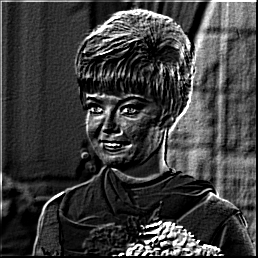

In [12]:
# emboss
kernal_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernal_emboss,1,2))

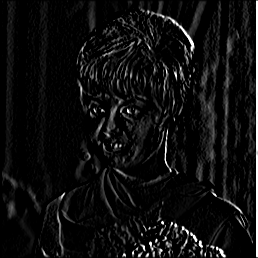

In [13]:
# left sobel edge detection
kernal_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernal_sobel,1,2))

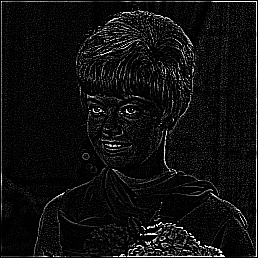

In [14]:
# canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))

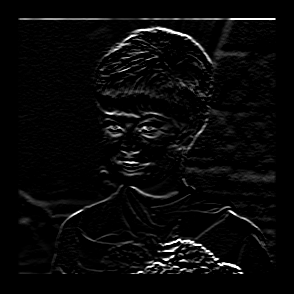

In [18]:
# Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])
cv2_imshow(convolution2d(img_female, kernel_prewitt,1,20))

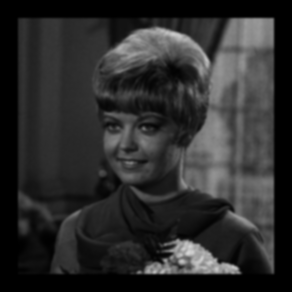

In [17]:
# 5x5 Gaussian Blur
kernel_gaussian5x5 = np.array([[1,4,6,4,1],
                                 [4,16,24,16,4],
                                 [6,24,36,24,6],
                                 [4,16,24,16,4],
                                 [1,4,5,4,1]]) * 1/256
cv2_imshow(convolution2d(img_female, kernel_gaussian5x5,1,20))

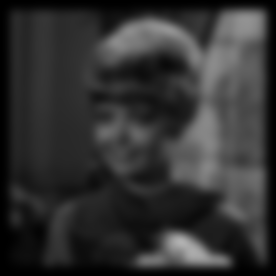

In [19]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
kernel_gaussian = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss = kernel_gaussian @ kernel_gaussian.transpose()
cv2_imshow(convolution2d(img_female, kernel_gauss,1,20))